In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
coordinates = list(lat_lngs)

In [15]:
from citipy import citipy

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 2 of Set 1 | souillac
Processing Record 3 of Set 1 | luderitz
Processing Record 4 of Set 1 | tilichiki
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | vila franca do campo
Processing Record 8 of Set 1 | chicama
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | ostrovnoy
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | dolores
Processing Record 17 of Set 1 | sumbe
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 o

Processing Record 37 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 38 of Set 4 | pinkafeld
Processing Record 39 of Set 4 | hobyo
Processing Record 40 of Set 4 | salamiyah
Processing Record 41 of Set 4 | svetlogorsk
Processing Record 42 of Set 4 | mahon
Processing Record 43 of Set 4 | caravelas
Processing Record 44 of Set 4 | siguiri
Processing Record 45 of Set 4 | catalina
Processing Record 46 of Set 4 | asfi
Processing Record 47 of Set 4 | shakhovskaya
Processing Record 48 of Set 4 | pringsewu
Processing Record 49 of Set 4 | oktyabrskiy
Processing Record 50 of Set 4 | mount gambier
Processing Record 1 of Set 5 | gambela
Processing Record 2 of Set 5 | nador
Processing Record 3 of Set 5 | bluff
Processing Record 4 of Set 5 | sikasso
Processing Record 5 of Set 5 | asayita
City not found. Skipping...
Processing Record 6 of Set 5 | kaeo
Processing Record 7 of Set 5 | luganville
Processing Record 8 of Set 5 | rosetta
Processing Record 9 of Set 5 | cam ranh
Processing 

Processing Record 24 of Set 8 | ostersund
Processing Record 25 of Set 8 | bourg-en-bresse
Processing Record 26 of Set 8 | nago
Processing Record 27 of Set 8 | uvalde
Processing Record 28 of Set 8 | trairi
Processing Record 29 of Set 8 | touros
Processing Record 30 of Set 8 | pilas
Processing Record 31 of Set 8 | stephenville
Processing Record 32 of Set 8 | vardo
Processing Record 33 of Set 8 | lamu
Processing Record 34 of Set 8 | kuchinarai
Processing Record 35 of Set 8 | muzhi
Processing Record 36 of Set 8 | shambu
Processing Record 37 of Set 8 | devils lake
Processing Record 38 of Set 8 | ixtapa
Processing Record 39 of Set 8 | thayetmyo
Processing Record 40 of Set 8 | borovichi
Processing Record 41 of Set 8 | mkushi
Processing Record 42 of Set 8 | clarksburg
Processing Record 43 of Set 8 | saleaula
City not found. Skipping...
Processing Record 44 of Set 8 | ploemeur
Processing Record 45 of Set 8 | borogontsy
Processing Record 46 of Set 8 | gizo
Processing Record 47 of Set 8 | haveloc

Processing Record 12 of Set 12 | kihei
Processing Record 13 of Set 12 | fort saint john
City not found. Skipping...
Processing Record 14 of Set 12 | ulaangom
Processing Record 15 of Set 12 | la plata
Processing Record 16 of Set 12 | oranjemund
Processing Record 17 of Set 12 | oranzherei
Processing Record 18 of Set 12 | ambunti
Processing Record 19 of Set 12 | kerema
Processing Record 20 of Set 12 | maumere
Processing Record 21 of Set 12 | velizh
Processing Record 22 of Set 12 | teluknaga
Processing Record 23 of Set 12 | nanfeng
Processing Record 24 of Set 12 | laramie
Processing Record 25 of Set 12 | semey
Processing Record 26 of Set 12 | selma
Processing Record 27 of Set 12 | valle de allende
Processing Record 28 of Set 12 | padang
Processing Record 29 of Set 12 | okhotsk
Processing Record 30 of Set 12 | musiri
Processing Record 31 of Set 12 | boyolangu
Processing Record 32 of Set 12 | oistins
Processing Record 33 of Set 12 | burnie
Processing Record 34 of Set 12 | yoichi
Processing R

In [23]:
len(city_data)

562

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Souillac,-20.5167,57.5167,77.38,69,40,13.80,MU,2022-05-16 15:38:43
1,Luderitz,-26.6481,15.1594,73.54,32,1,2.04,NA,2022-05-16 15:38:44
2,Tilichiki,60.4667,166.1000,32.56,98,100,3.98,RU,2022-05-16 15:38:44
3,Albany,42.6001,-73.9662,78.42,74,58,3.00,US,2022-05-16 15:38:44
4,Jamestown,42.0970,-79.2353,56.01,94,100,5.99,US,2022-05-16 15:38:45
5,Vila Franca Do Campo,37.7167,-25.4333,63.01,64,68,15.61,PT,2022-05-16 15:38:45
6,Chicama,-7.8447,-79.1469,63.14,62,60,7.90,PE,2022-05-16 15:38:45
7,Mataura,-46.1927,168.8643,56.48,95,74,1.86,NZ,2022-05-16 15:38:46
8,Khatanga,71.9667,102.5000,27.00,91,97,9.44,RU,2022-05-16 15:38:46
9,Ribeira Grande,38.5167,-28.7000,61.20,63,40,24.16,PT,2022-05-16 15:38:46


In [26]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [27]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Souillac,MU,2022-05-16 15:38:43,-20.5167,57.5167,77.38,69,40,13.80
1,Luderitz,NA,2022-05-16 15:38:44,-26.6481,15.1594,73.54,32,1,2.04
2,Tilichiki,RU,2022-05-16 15:38:44,60.4667,166.1000,32.56,98,100,3.98
3,Albany,US,2022-05-16 15:38:44,42.6001,-73.9662,78.42,74,58,3.00
4,Jamestown,US,2022-05-16 15:38:45,42.0970,-79.2353,56.01,94,100,5.99


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
import_file = "weather_data/cities.csv"
city_data_df = pd.read_csv(import_file)

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1652731442.338787

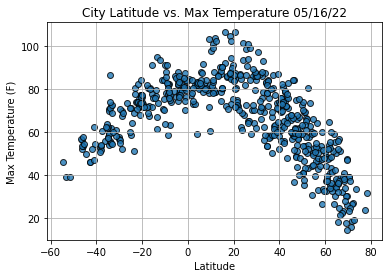

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

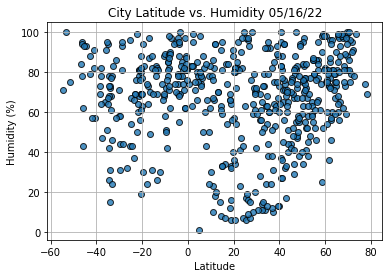

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

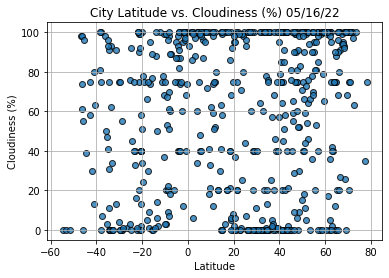

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

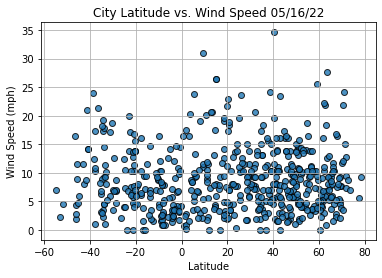

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()